<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 TESLA Analysis
  </h1>
</div>

In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [2]:
import warnings
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from eda.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# variable
TICKER= 'TSLA'

In [5]:
#paths
RAW_DATA_PATH='../../data/raw/yfinance_data/'+TICKER+'_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/'+TICKER+'_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [6]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/TSLA_historical_data.csv (type=csv)


INFO:data.load_data:Data loaded successfully. Shape: (3545, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


### Dataset Overview

In [7]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2287,2019-07-31,16.200001,16.445333,15.776667,16.107332,16.107332,137673000,0.0,0.0
1963,2018-04-17,19.257999,19.478001,18.834000,19.179333,19.179333,105000000,0.0,0.0
2218,2019-04-23,17.343332,17.706667,17.049999,17.593332,17.593332,164158500,0.0,0.0
734,2013-05-30,6.830667,7.302667,6.746667,6.996667,6.996667,242005500,0.0,0.0
3156,2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800,0.0,0.0
682,2013-03-15,2.442667,2.443333,2.347333,2.352667,2.352667,49194000,0.0,0.0
981,2014-05-22,13.356667,13.792000,13.304000,13.658667,13.658667,93217500,0.0,0.0
1278,2015-07-28,17.049999,17.693333,16.789333,17.654667,17.654667,58437000,0.0,0.0
2323,2019-09-20,16.432667,16.463333,15.877333,16.041332,16.041332,95295000,0.0,0.0
223,2011-05-17,1.800000,1.800000,1.714667,1.730667,1.730667,18513000,0.0,0.0


In [8]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0


In [9]:
#shape of the dataset
df.shape

(3545, 9)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [11]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3545.0,7.550566e+01,1.025305e+02,1.076000e+00,1.151667e+01,1.746333e+01,1.618800e+02,4.114700e+02
High,3545.0,7.715924e+01,1.048065e+02,1.108667e+00,1.186133e+01,1.768867e+01,1.653333e+02,4.144967e+02
Low,3545.0,7.374349e+01,1.000518e+02,9.986670e-01,1.121667e+01,1.710000e+01,1.583600e+02,4.056667e+02
Close,3545.0,7.548726e+01,1.024566e+02,1.053333e+00,1.156533e+01,1.745933e+01,1.614800e+02,4.099700e+02
Adj Close,3545.0,7.548726e+01,1.024566e+02,1.053333e+00,1.156533e+01,1.745933e+01,1.614800e+02,4.099700e+02
Volume,3545.0,9.699708e+07,7.866828e+07,1.777500e+06,4.770600e+07,8.250600e+07,1.228890e+08,9.140820e+08
Dividends,3545.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,3545.0,2.256700e-03,9.792132e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [12]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,3545,3545,2010-06-29,1


In [13]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3545 non-null   object 
 1   Open          3545 non-null   float64
 2   High          3545 non-null   float64
 3   Low           3545 non-null   float64
 4   Close         3545 non-null   float64
 5   Adj Close     3545 non-null   float64
 6   Volume        3545 non-null   int64  
 7   Dividends     3545 non-null   float64
 8   Stock Splits  3545 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 249.4+ KB


In [14]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            3545
Volume          3514
Close           3343
Adj Close       3343
Low             3249
Open            3238
High            3233
Stock Splits       3
Dividends          1
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [15]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [16]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [17]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [18]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [19]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [20]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [21]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [22]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 3545/3545 (0 became NaT)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3545 non-null   datetime64[ns, UTC]
 1   Open          3545 non-null   float64            
 2   High          3545 non-null   float64            
 3   Low           3545 non-null   float64            
 4   Close         3545 non-null   float64            
 5   Adj Close     3545 non-null   float64            
 6   Volume        3545 non-null   int64              
 7   Dividends     3545 non-null   float64            
 8   Stock Splits  3545 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 249.4 KB


In [24]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [25]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
3347,2023-10-16 00:00:00+00:00,250.050003,255.399994,248.479996,253.919998,253.919998,88917200,0.0,0.0
174,2011-03-08 00:00:00+00:00,1.640000,1.664000,1.600000,1.644000,1.644000,20998500,0.0,0.0
1125,2014-12-16 00:00:00+00:00,13.392667,13.578667,13.024667,13.187333,13.187333,126391500,0.0,0.0
1863,2017-11-20 00:00:00+00:00,20.919333,21.033333,20.316668,20.582666,20.582666,123715500,0.0,0.0
2157,2019-01-24 00:00:00+00:00,18.868668,19.578667,18.618668,19.434000,19.434000,120183000,0.0,0.0
2841,2021-10-11 00:00:00+00:00,262.549988,267.079987,261.833344,263.980011,263.980011,42600900,0.0,0.0
2415,2020-02-03 00:00:00+00:00,44.912666,52.409332,44.901333,52.000000,52.000000,705975000,0.0,0.0
2728,2021-04-30 00:00:00+00:00,222.529999,238.490005,222.046661,236.479996,236.479996,122276100,0.0,0.0
426,2012-03-07 00:00:00+00:00,2.208000,2.220667,2.194000,2.208000,2.208000,5473500,0.0,0.0
2194,2019-03-19 00:00:00+00:00,17.833332,18.219999,17.563999,17.831333,17.831333,177009000,0.0,0.0


In [26]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze

In [27]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv(CLEANED_DATA_PATH)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00+00:00,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00+00:00,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00+00:00,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00+00:00,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3540,2024-07-24 00:00:00+00:00,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0
3541,2024-07-25 00:00:00+00:00,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0
3542,2024-07-26 00:00:00+00:00,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0
3543,2024-07-29 00:00:00+00:00,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0


In [28]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [29]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00+00:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00+00:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00+00:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00+00:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00+00:00  1.333333  1.333333  1.055333  1.074000   

   Adj Close     Volume  Dividends  Stock Splits  
0   1.592667  281494500        0.0           0.0  
1   1.588667  257806500        0.0           0.0  
2   1.464000  123282000        0.0           0.0  
3   1.280000   77097000        0.0           0.0  
4   1.074000  103003500        0.0           0.0  


In [30]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date     Close  momentum_rsi     Volume  trend_macd
0 2010-06-29 00:00:00+00:00  1.592667           NaN  281494500         NaN
1 2010-06-30 00:00:00+00:00  1.588667           NaN  257806500         NaN
2 2010-07-01 00:00:00+00:00  1.464000           NaN  123282000         NaN
3 2010-07-02 00:00:00+00:00  1.280000           NaN   77097000         NaN
4 2010-07-06 00:00:00+00:00  1.074000           NaN  103003500         NaN


{'Cumulative Return': 139.1300525523751, 'Annualized Volatility': 0.5694405497796355, 'Sharpe Ratio': 0.8653832806856596, 'Max Drawdown': -0.736322174421912, 'Calmar Ratio': 188.95268591035764}


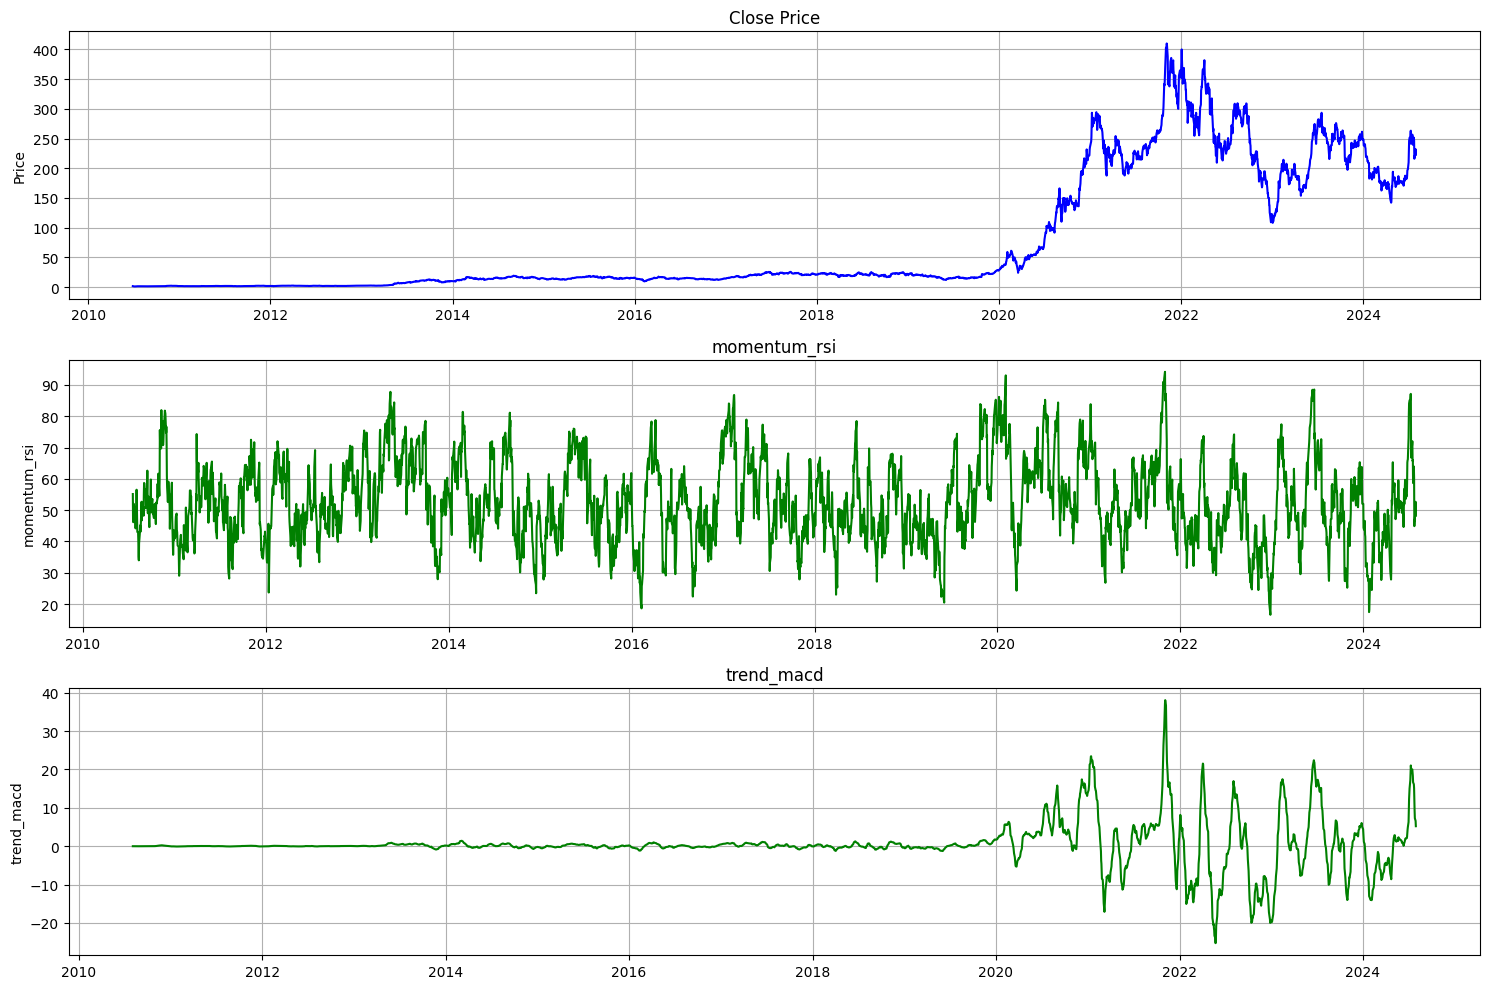

In [31]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()